<a href="https://colab.research.google.com/github/MMoltira/DataMining/blob/master/Debt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #เอาข้อมูลเข้า
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/DWDM_material'

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
avg_Debt_1 = os.path.join(path,'avg_Debt_1.csv')

In [ ]:
avg_Debt_1 = pd.read_csv(avg_Debt_1)
avg_Debt_1

,จังหวัด,avg_debt
0,กรุงเทพมหานคร 53,207665.0
1,สมุทรปราการ 53,117360.8
2,นนทบุรี 53,240769.0
3,ปทุมธานี 53,220761.2
4,พระนครศรีอยุธยา 53,163424.5
...,...,...
226,ตรัง 55,160207.0
227,พัทลุง 55,162248.7
228,ปัตตานี 55,109102.5
229,ยะลา 55,35828.9


In [ ]:
avg_Debt_1.shape

(231, 2)

In [ ]:
avg_Debt_1.isnull().any()

จังหวัด     False
avg_debt     True
dtype: bool

In [ ]:
avg_Debt_1[['avg_debt']] = avg_Debt_1[['avg_debt']].fillna(0) 

In [ ]:
avg_Debt_1.isnull().any()

จังหวัด     False
avg_debt    False
dtype: bool

In [ ]:
avg_Debt_1 = avg_Debt_1.sort_values('avg_debt')

In [ ]:
avg_Debt_1

,จังหวัด,avg_debt
128,บึงกาฬ 54,0.0
51,บึงกาฬ 53,0.0
100,สมุทรสงคราม 54,9244.0
177,สมุทรสงคราม 55,9857.2
75,ยะลา 53,18901.5
...,...,...
156,นนทบุรี 55,260752.2
162,ชัยนาท 55,264144.0
154,กรุงเทพมหานคร 55,275576.8
5,อ่างทอง 53,309493.7


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.4
numpy   version = 1.18.5
seaborn version = 0.11.0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = avg_Debt_1[['avg_debt']]
# X = df[[''avg_debt 53',	'avg_debt 54',	'avg_debt 55'']]

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
Xmean=make_blobs(n_samples=231, centers=3, n_features=2, random_state=6)

In [ ]:
X.shape 

(231, 2)

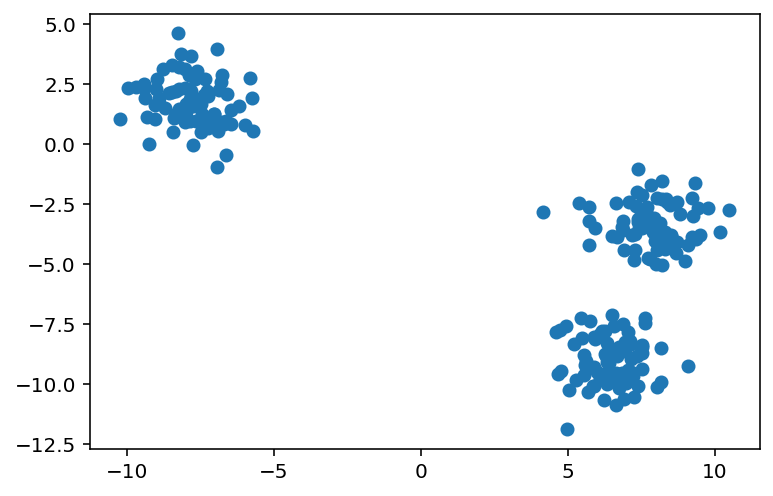

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(X) # predict ว่าอยู่ในกลุ่มไหน

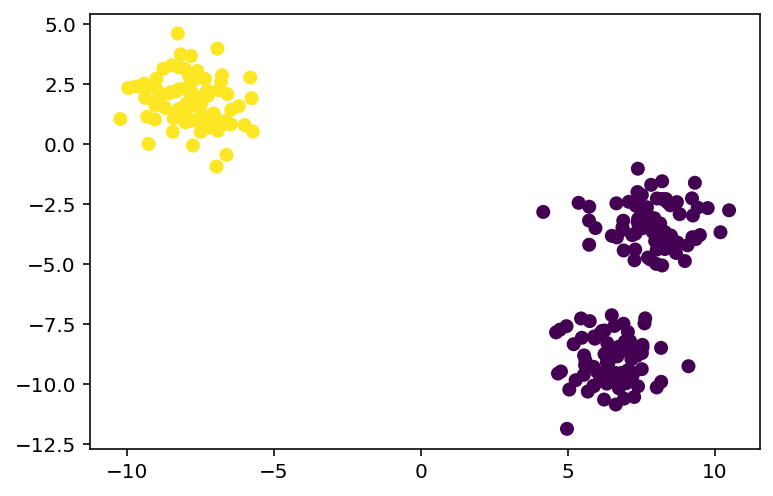

In [ ]:
plt.scatter(X[:,0], X[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
n_krachuk = 2 # จำนวนกระจุก
n_thamsam = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueak = np.random.choice(len(X),n_krachuk,replace=0)
X_cen = X[sumlueak] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsam):
    raya2 = ((X_cen[None]-X[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klum = raya2.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_mai = np.empty_like(X_cen) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuk):
        if(len(X[klum==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_mai[j] = X[klum==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_mai[j] = X[np.random.randint(len(X))]
    if(np.allclose(X_cen,X_cen_mai,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cen = X_cen_mai
        break
    X_cen = X_cen_mai # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

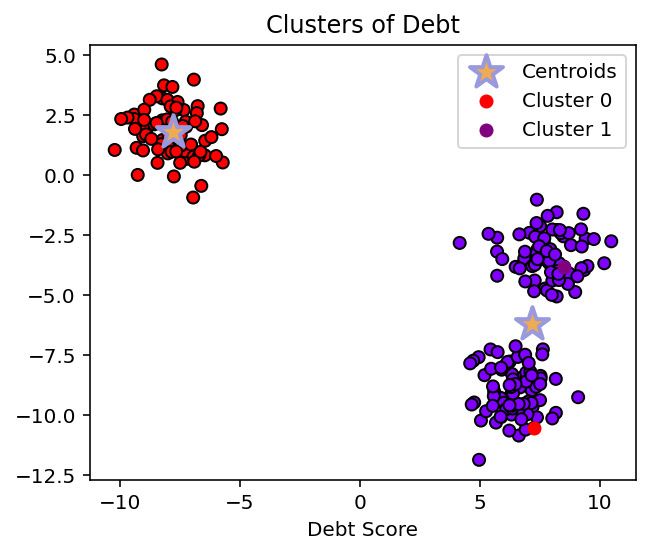

In [ ]:
raya2 = ((X_cen[None]-X[:,None])**2).sum(2)
z = raya2.argmin(1)
plt.gca(aspect=1)
plt.scatter(X[:,0],X[:,1],c=z,edgecolor='k',cmap='rainbow')
plt.scatter(X_cen[:,0],X_cen[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(X[0,0], X[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(X[1,0], X[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Debt')
plt.xlabel('Debt Score')
plt.legend()
plt.show()

In [ ]:
sse = 0
for i in range(n_krachuk):
    sse += np.sum(raya2[z==i,i])
print(sse)

1751.9669425508212


In [ ]:
KMclust.cluster_centers_

array([[ 7.17049205, -6.18852947],
       [-7.79775007,  1.78610777]])

In [ ]:
KMclust.transform(X) # the distance between each point and centroid

array([[ 4.35657384, 19.46286796],
       [ 2.71215952, 17.25282908],
       [ 2.70884496, 16.22743323],
       [ 5.05983897, 17.45766143],
       [ 2.02897205, 16.04954075],
       [ 2.56177615, 16.71518607],
       [15.64664579,  1.34745187],
       [ 3.4711508 , 18.87195087],
       [16.62190693,  1.50652845],
       [ 2.7266152 , 17.23167107],
       [16.6160869 ,  0.34904234],
       [ 4.03944671, 16.52353791],
       [ 3.85827321, 14.22449676],
       [17.02789616,  0.19453677],
       [ 3.61896268, 18.53323763],
       [17.58481661,  0.66590015],
       [ 2.30713982, 17.77093305],
       [17.02693124,  1.03696265],
       [17.19176311,  0.52754238],
       [15.33005926,  1.64582881],
       [15.60783922,  1.39409006],
       [ 2.91852292, 16.48022043],
       [ 3.12708999, 18.0930437 ],
       [ 2.26100905, 17.36691817],
       [15.76940085,  2.22813124],
       [ 2.44106119, 17.36937133],
       [ 4.77217036, 18.84251956],
       [ 3.43700643, 18.43292038],
       [ 2.62046403,

In [ ]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

[[2, 1751.9669425508212],
 [3, 444.034965979045],
 [4, 380.8832597611778],
 [5, 327.11249208354513],
 [6, 274.2949319203781],
 [7, 242.1594389245151],
 [8, 209.91382876503124],
 [9, 185.83511794182064]]

In [ ]:
xy=np.array(ssd)
print(xy)

[[   2.         1751.96694255]
 [   3.          444.03496598]
 [   4.          380.88325976]
 [   5.          327.11249208]
 [   6.          274.29493192]
 [   7.          242.15943892]
 [   8.          209.91382877]
 [   9.          185.83511794]]


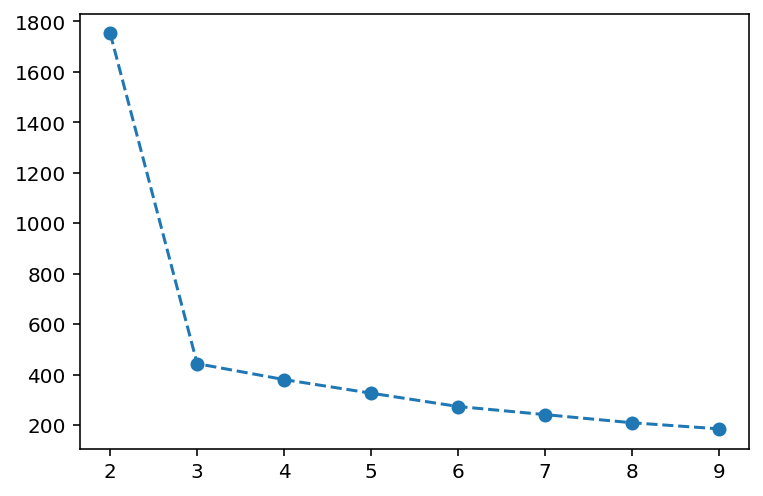

In [ ]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [ ]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,1751.966943
1,3,444.034966
2,4,380.883260
3,5,327.112492
4,6,274.294932
5,7,242.159439
6,8,209.913829
7,9,185.835118


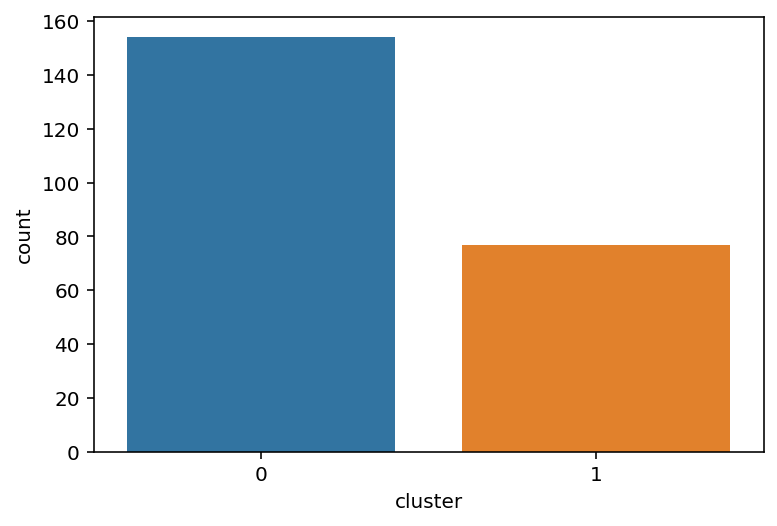

In [ ]:
sns.countplot(x='cluster', data=avg_Debt_1)

In [ ]:
avg_Debt_1.groupby('cluster').describe().T

cluster                     0              1
avg_debt count     154.000000      77.000000
         mean   129028.938312  135418.225974
         std     55504.453195   60090.011163
         min         0.000000   27061.000000
         25%     96679.250000   90411.000000
         50%    125007.850000  125646.100000
         75%    165346.100000  173821.400000
         max    386957.400000  309493.700000

In [ ]:
avg_Debt_1

,จังหวัด,avg_debt,cluster
128,บึงกาฬ 54,0.0,0
51,บึงกาฬ 53,0.0,0
100,สมุทรสงคราม 54,9244.0,0
177,สมุทรสงคราม 55,9857.2,0
75,ยะลา 53,18901.5,0
...,...,...,...
156,นนทบุรี 55,260752.2,1
162,ชัยนาท 55,264144.0,0
154,กรุงเทพมหานคร 55,275576.8,1
5,อ่างทอง 53,309493.7,1
